In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn import model_selection, preprocessing
from sklearn.metrics import log_loss

matplotlib.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
data = pd.read_csv('./data/train.csv')
# split train and validation
cv = model_selection.StratifiedShuffleSplit(n_splits=1, test_size=.1, random_state=123)

train_ind, val_ind = next(cv.split(data['text'], data['author']))

x_train = data.loc[train_ind, 'text'].values
y_train = data.loc[train_ind, 'author'].values
x_val = data.loc[val_ind, 'text'].values
y_val = data.loc[val_ind, 'author'].values

In [5]:
#%% some utility code
# dictionary to manually converts greek/spanish chars into closest english chars
toEnglishDict = {}
srcStr = ['à','â','ä','å','æ','ç','è','é','ê','ë','ï','î','ñ','ô','ö','õ','ü','û','α','δ','ν','ο','π','ς','υ','ἶ']
dstStr = ['a','a','a','a','a','c','e','e','e','e','i','i','n','o','o','o','u','u','a','d','n','o','p','s','y','i']
for src,dst in zip(srcStr,dstStr):
    toEnglishDict[src] = dst
    
# function that converts all non english chars to their closest english char counterparts
def myunidecode(inString):
    outString = ''
    for ch in inString:
        if ch in toEnglishDict.keys():
            outString += toEnglishDict[ch]
        else:
            outString += ch
    return outString

In [14]:
def get_author_char_dict(x, y, convert_char=False, lower=True):
    char_dict = {}
    for key in ['all', 'EAP', 'HPL', 'MWS']:
        char_dict[key] = []
    
    for text, author in zip(x, y):
        if lower:
            text = text.lower()
        if convert_char:
            text = myunidecode(text)
        
        chars = [c for c in text]
        
        char_dict['all'] += chars
        char_dict[author] += chars
    return char_dict

char_dict = get_author_char_dict(x_train, y_train, True, True)

In [15]:
#%% show char usage histogram for the three authors
charEncoder = preprocessing.LabelEncoder()
charEncoder.fit(char_dict['all'])

charCounts_EAP = np.histogram(charEncoder.transform(char_dict['EAP']),range(len(charEncoder.classes_)+1),density=True)[0]
charCounts_HPL = np.histogram(charEncoder.transform(char_dict['HPL']),range(len(charEncoder.classes_)+1),density=True)[0]
charCounts_MWS = np.histogram(charEncoder.transform(char_dict['MWS']),range(len(charEncoder.classes_)+1),density=True)[0]

# sort the char classes by their usage frequency
sortedChars = np.flipud(np.argsort(charCounts_EAP + charCounts_HPL + charCounts_MWS))

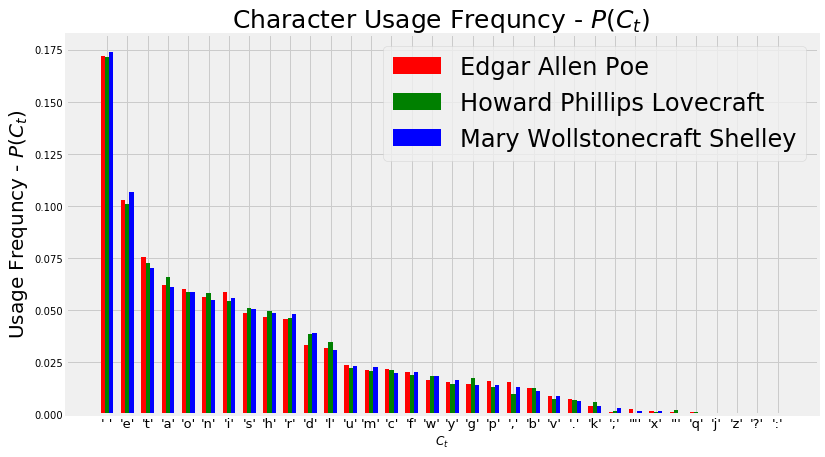

In [16]:
barWidth = 0.21
x = np.arange(len(charCounts_EAP))

plt.figure(figsize=(12,7)); plt.title('Character Usage Frequncy - $P(C_t)$ ',fontsize=25);
plt.bar(x-barWidth, charCounts_EAP[sortedChars], barWidth, color='r', label='Edgar Allen Poe');
plt.bar(x         , charCounts_HPL[sortedChars], barWidth, color='g', label='Howard Phillips Lovecraft');
plt.bar(x+barWidth, charCounts_MWS[sortedChars], barWidth, color='b', label='Mary Wollstonecraft Shelley');
plt.legend(fontsize=24); plt.ylabel('Usage Frequncy - $P(C_t)$', fontsize=20); plt.xlabel('$C_t$');
plt.xticks(x,["'%s'" %(charEncoder.classes_[i]) for i in sortedChars], fontsize=13);

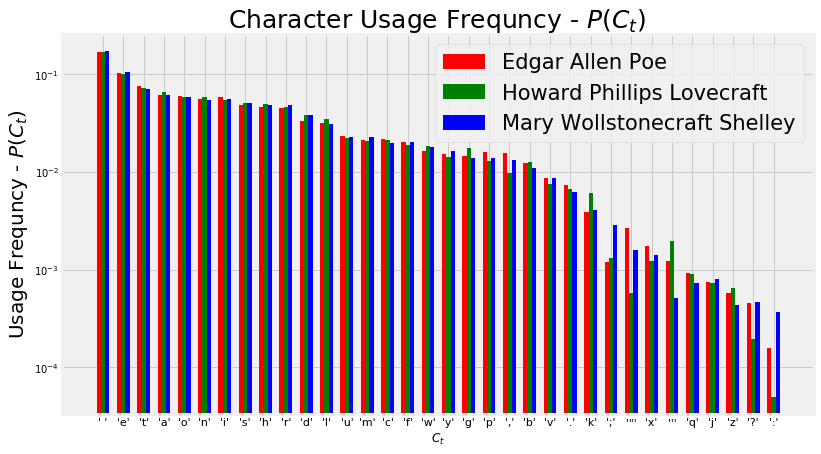

In [17]:
barWidth = 0.21
x = np.arange(len(charCounts_EAP))

plt.figure(figsize=(12,7)); 
plt.title('Character Usage Frequncy - $P(C_t)$ ',fontsize=25);
plt.bar(x-barWidth, charCounts_EAP[sortedChars], barWidth, color='r', label='Edgar Allen Poe');
plt.bar(x         , charCounts_HPL[sortedChars], barWidth, color='g', label='Howard Phillips Lovecraft');
plt.bar(x+barWidth, charCounts_MWS[sortedChars], barWidth, color='b', label='Mary Wollstonecraft Shelley');
plt.legend(fontsize=21); plt.ylabel('Usage Frequncy - $P(C_t)$', fontsize=20); 
plt.yscale("log", nonposy='clip'); plt.xlabel('$C_t$');
plt.xticks(x,["'%s'" %(charEncoder.classes_[i]) for i in sortedChars], fontsize=11);

In [18]:
charCounts_EAP

array([  1.71922652e-01,   2.65898931e-03,   1.20961814e-03,
         1.56510380e-02,   7.43431704e-03,   1.57862074e-04,
         1.20863150e-03,   4.51880187e-04,   6.21414188e-02,
         1.24780103e-02,   2.17425408e-02,   3.32062873e-02,
         1.02688292e-01,   2.02576506e-02,   1.45716561e-02,
         4.67942653e-02,   5.85747225e-02,   7.41951747e-04,
         3.88143374e-03,   3.18575532e-02,   2.12117295e-02,
         5.61091143e-02,   6.02500338e-02,   1.58957242e-02,
         9.29412960e-04,   4.58036808e-02,   4.86817037e-02,
         7.54176192e-02,   2.34642240e-02,   8.72582614e-03,
         1.62795264e-02,   1.73549618e-03,   1.52869686e-02,
         5.78169846e-04])